# DRAFT WORKBOOK:
## CAN I GET A LITTLE CREDIT? 
### An Exploration of Credit Worthiness, Using Classification to Predict Serious Repayment Delinquency

Personal Project & Final Report Created By: Rachel Robbins-Mayhill | April , 2022

In [1]:
# Import for data manipulation
import pandas as pd
import numpy as np

# Import for data viz
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import squarify

# Import for Hypothesis Testing
import scipy.stats as stats
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Import for acquisition
import env
import os
import wrangle

# Add for setting to see all rows and columns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

# Import to ignore warnings
import warnings
warnings.filterwarnings('ignore')

## PROJECT DESCRIPTION

Banks play a crucial role in market economies. They decide who can get finance and on what terms and can make or break investment decisions. For markets and society to function, individuals and companies need access to credit. 

Credit scoring algorithms, which make a guess at the probability of default, are the methods banks use to determine whether or not a loan should be granted. This project aims to improve upon the state of the art in credit scoring, by predicting the probability that somebody will experience financial distress in the next two years.

I am interested in this project because identifying at-risk populations helps to protect the consumer, the business, the market, and society as a whole. Identifying customers who are at risk of default helps to prevent the consumer from entering into a situation that could be harmful to their long-term financial stability. It helps the banking institution prevent significant and costly losses which could impact business sustainability and limit the potential to help others. Lastly, as we saw with the housing crisis of 2008, accurately identifying at-risk loan applicants can prevent the destabilizing of the market which can have far-reaching consequences for society as a whole.

## PROJECT GOAL

The goal of this project is to build a model that borrowers can use to help make the best financial decisions.

## I. ACQUIRE

In [2]:
# acquire dataset
df = pd.read_csv('client_data.csv')
# view first few rows
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [3]:
# size of dataset
df.shape

(150000, 12)

In [4]:
# view column names and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [5]:
# Obtain count of nulls per column
df.isnull().sum()

Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [6]:
# View descriptive stats for all columns
df.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


===================================================================================================================================

## II. PREPARE

Tasks to prepare:

- Delete "Unnamed' index
- Rename columns for understanding, while making lowercase
- Drop missing values (29_731 in monthly_income and 3_924 in quantity_dep)
- Deal with outliers - only if they impact exploration or modeling

In [7]:
# apply the data preparation observations and tasks to clean the data using the wrangle_client function found in the wrangle.py
df = wrangle.wrangle_client(df)
df.head()

,serious_delinquency,revolv_unsec_utilization,age,quantity_30_59_pd,debt_to_income_ratio,monthly_income,quantity_loans_and_lines,quantity_90_days_pd,quantity_real_estate_loans,quantity_60_89_days_pd,quantity_dependents,age_bins,quantity_dependents_bins
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,age_40-49,1_2_dep
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,age_40-49,1_2_dep
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,age_30-39,0_dep
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,age_30-39,0_dep
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,age_40-49,0_dep


----

### PREPARE - UNIVARIATE

### Univariate exploration will be conducted on the following variables:
1. Serious Delinquency - Target Variable (boolean)
    - Person experienced 90 days past due delinquency or worse (0= False / 1= True)
2. quantity_90_days_pd 
    - Number of times borrower has been 90 days or more past due.
3. age
    - Age of borrower in years   
4. revolv_unsec_utilization (Revolving Unsecured Loan Utilization)
    - Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits
5. monthly_income 
    - Total monthly income
6. debt_to_income_ratio 
    - Monthly debt payments, alimony,living costs divided by monthy gross income
7. quantity_30_59_pd
    - Number of times borrower has been 30-59 days past due but no worse in the last 2 years.
8. quantity_60_89_days_pd 
    - Number of times borrower has been 60-89 days past due but no worse in the last 2 years.
9. quantity_real_estate_loans 
    - Number of mortgage and real estate loans including home equity lines of credit
10. quantity_dependents     
    - Number of dependents in family excluding themselves (spouse, children etc.)

---

### UNIVARIATE QUESTION 1: Target Variable -> Serious Delinquency
- What is the distribution of the Target Variable (Serious Delinquency)?

0    111912
1      8357
Name: serious_delinquency, dtype: int64


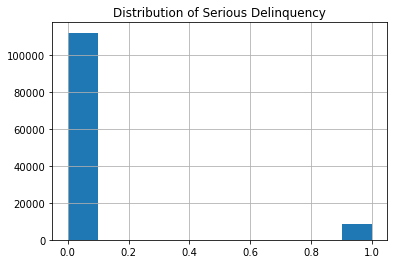

In [8]:
# View distribution of target variable: serious_delinquency
print(df.serious_delinquency.value_counts())
plt.title("Distribution of Serious Delinquency")
df.serious_delinquency.hist()
plt.show()

0    111912
1      8357
Name: serious_delinquency, dtype: int64


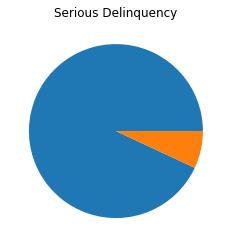

Percent seriously delinquent from dataset


0.069

In [9]:
# Another visual option. 

print(df.serious_delinquency.value_counts())

y = df.serious_delinquency.value_counts()
plt.title('Serious Delinquency')
plt.pie(y)
plt.show() 

print("Percent seriously delinquent from dataset")
round(df.serious_delinquency.mean(), 3)

### OBSERVATIONS: 
- This is an inbalanced dataset with 7% relating to the target variable for serious delinquency. Consider resampling to create a more balanced dataset. 

---

### UNIVARIATE QUESTION 2: quantity_90_days_pd 
- What is the distribution of the quantity of 90 days past due?

In [10]:
# Obtain descriptive stats for variable
df.quantity_90_days_pd.describe()

count    120269.000000
mean          0.211925
std           3.465276
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          98.000000
Name: quantity_90_days_pd, dtype: float64

In [11]:
df.groupby('quantity_90_days_pd').quantity_90_days_pd.count()

quantity_90_days_pd
0     113544
1       4312
2       1234
3        543
4        241
5        103
6         62
7         29
8         16
9         14
10         8
11         4
12         2
13         4
14         2
15         2
17         1
96         4
98       144
Name: quantity_90_days_pd, dtype: int64

(0.0, 1000.0)

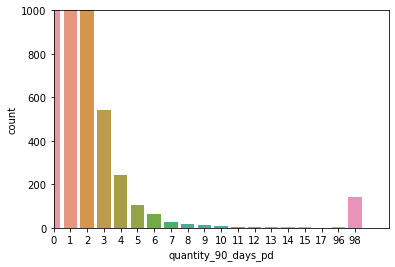

In [12]:
sns.countplot(data= df, x= 'quantity_90_days_pd')  
plt.xlim(0, 20)
plt.ylim(0, 1000)

### OBSERVATIONS: 
- Most have zero 90 days past due instances. 
- 144 instances of being past due 98 times, seems unusual, compared to the other quanities. 
- Consider binning 


---

### UNIVARIATE QUESTION 3: age
- What is the distribution of age?

** We have to be careful when utilizing the age variable in modeling, as age cannot be used as a reason to approve or deny someone credit according to the Fair Lending Laws. **

In [13]:
# Obtain descriptive stats for variable
df.age.describe()

count    120269.000000
mean         51.289792
std          14.426684
min           0.000000
25%          40.000000
50%          51.000000
75%          61.000000
max         103.000000
Name: age, dtype: float64

In [14]:
df.groupby('age').age.count()

age
0         1
21      130
22      329
23      515
24      652
25      797
26     1012
27     1126
28     1349
29     1468
30     1674
31     1783
32     1804
33     1957
34     1867
35     1930
36     2056
37     2157
38     2266
39     2566
40     2645
41     2660
42     2633
43     2751
44     2820
45     2969
46     3117
47     3134
48     3163
49     3217
50     3105
51     3001
52     2951
53     2974
54     2905
55     2745
56     2846
57     2699
58     2702
59     2574
60     2505
61     2713
62     2725
63     2802
64     2278
65     1922
66     1874
67     1835
68     1613
69     1443
70     1270
71     1212
72     1226
73     1093
74     1059
75      860
76      839
77      775
78      749
79      697
80      621
81      530
82      443
83      317
84      304
85      309
86      254
87      211
88      193
89      178
90      114
91       83
92       55
93       48
94       21
95       20
96        6
97       10
98        3
99        3
101       2
102       2
103       2


### OBSERVATIONS: 
- Most of the age data seems reasonable. 
- There is one instance of age listed as 0, which would most likely be an input error, but 1 instance won't be impactful. 
- Ages over 100, might seem unusual, but the quantities are not large or alarming. 
- Most are between 26 and 74, which seems reasonable.
- I will not delete any age data, as there is not any alarming or drastically unusual data. 
- Consider binning into age categories (0 - 29), (30 - 39), (40 - 49), (50 - 59), (60 - 69), (70 - 79), (80 - 89), (90 and above)

---

### UNIVARIATE QUESTION 4: revolv_unsec_utilization (Revolving Unsecured Loan Utilization)
- What is the distribution of Revolving Unsecured Loan Utilization?
- revolv_unsec_utilization -> Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits

In [15]:
# Obtain descriptive stats for variable
df. revolv_unsec_utilization.describe()

count    120269.000000
mean          5.899873
std         257.040685
min           0.000000
25%           0.035084
50%           0.177282
75%           0.579428
max       50708.000000
Name: revolv_unsec_utilization, dtype: float64

In [16]:
# sns.histplot(data= df, x='revolv_unsec_utilization')  

### OBSERVATIONS: 


---

### UNIVARIATE QUESTION 5: monthly_income 
- What is the distribution of monthly income?

In [17]:
# Obtain descriptive stats for variable
df.monthly_income.describe()

count    1.202690e+05
mean     6.670221e+03
std      1.438467e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.249000e+03
max      3.008750e+06
Name: monthly_income, dtype: float64

### OBSERVATIONS: 


---

### UNIVARIATE QUESTION 6: debt_to_income_ratio 
- What is the distribution of debt to income ratio?

Debt-to-income ratio is all monthly debt payments divided by gross monthly income. This number is one way lenders measure ability to manage monthly payments to repay borrowed money.

In [18]:
# Obtain descriptive stats for variable
df.debt_to_income_ratio.describe()

count    120269.000000
mean         26.598777
std         424.446457
min           0.000000
25%           0.143388
50%           0.296023
75%           0.482559
max       61106.500000
Name: debt_to_income_ratio, dtype: float64

### OBSERVATIONS: 


---

### UNIVARIATE QUESTION 7: quantity_30_59_pd
- What is the distribution of the quantity of 30 - 59 days past due?

In [19]:
# Obtain descriptive stats for variable
df.quantity_30_59_pd.describe()

count    120269.000000
mean          0.381769
std           3.499234
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          98.000000
Name: quantity_30_59_pd, dtype: float64

### OBSERVATIONS: 


---

### UNIVARIATE QUESTION 8: quantity_60_89_days_pd 
- What is the distribution of the quantity of 60 - 89 days past due?

In [20]:
# Obtain descriptive stats for variable
df.quantity_60_89_days_pd.describe()

count    120269.000000
mean          0.187829
std           3.447901
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          98.000000
Name: quantity_60_89_days_pd, dtype: float64

### OBSERVATIONS: 


---

### UNIVARIATE QUESTION 9: quantity_real_estate_loans 
- What is the distribution of quanitty of real estate loans?

In [21]:
# Obtain descriptive stats for variable
df.quantity_real_estate_loans.describe()

count    120269.000000
mean          1.054519
std           1.149273
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          54.000000
Name: quantity_real_estate_loans, dtype: float64

### OBSERVATIONS: 


---

### UNIVARIATE QUESTION 10: quantity_dependents 
- What is the distribution of quanitty of dependents?

In [22]:
# Obtain descriptive stats for variable
df.quantity_dependents.describe()

count    120269.000000
mean          0.851832
std           1.148391
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          20.000000
Name: quantity_dependents, dtype: float64

In [23]:
df.groupby('quantity_dependents').quantity_dependents.count()

quantity_dependents
0.0     65456
1.0     24379
2.0     18110
3.0      8745
4.0      2658
5.0       689
6.0       150
7.0        49
8.0        22
9.0         4
10.0        5
13.0        1
20.0        1
Name: quantity_dependents, dtype: int64

(0.0, 1000.0)

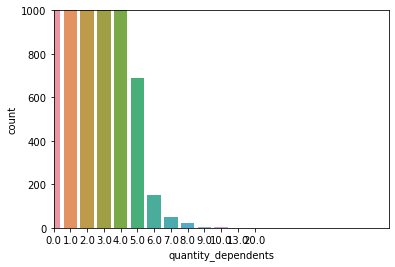

In [24]:
# visualize the data
sns.countplot(data= df, x= 'quantity_dependents')  
plt.xlim(0, 20)
plt.ylim(0, 1000)

### OBSERVATIONS: 
- Most of the dependent data seems reasonable. 
- There is one instance of depdendents listed as 13 and one of 20, which could be an data-entry error or could be accurate, but 1 instance of each won't be impactful.
- Most are between 0 and 5, which seems reasonable.
- I will not delete any dependent data, as there is not any alarming or drastically unusual data. 
- Consider binning into age categories (0), (1-2), (3-4), (5-6), (7 or more)

### UNIVARIATE EXPLORATION TAKEAWAYS

====================================================================================================================================================================================================

### PREPARE - SPLIT

In [25]:
plt.rc('figure', figsize=(20, 8))
# determine font size
plt.rc('font', size=15)
# determine style
plt.style.use('bmh')

In [26]:
# split the data into train, validate, and test using the split_data function found in the wrangle.py
train, validate, test = wrangle.split_data(df)

train -> (67350, 13)
validate -> (28865, 13)
test -> (24054, 13)


====================================================================================================================================================================================================

## III. EXPLORE - BIVARIATE

### EXPLORE QUESTIONS

1. Are applicants in certain age groups more likely to be seriously delinquent?
2. Are applicants with higher debt to income ratio more likely to be seriously delinquent?






### QUESTION: AGE
- Are applicants in certain age groups more likely to be seriously delinquent?

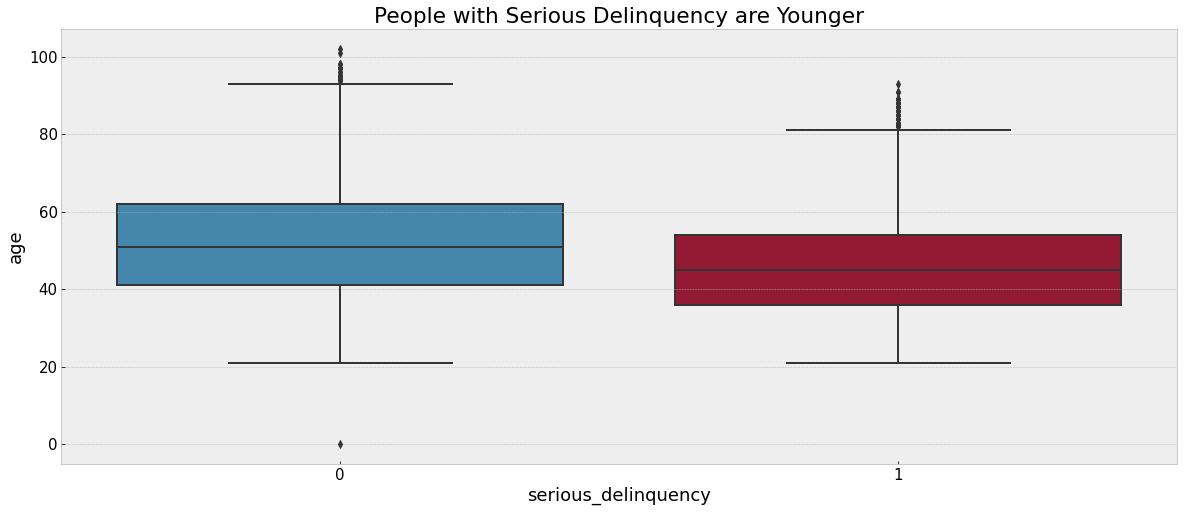

In [27]:
# create visualization for relationchip between age and serious delinquency
plt.title("People with Serious Delinquency are Younger")
sns.boxplot(data = train, x = 'serious_delinquency', y = 'age')
plt.show()

In [28]:
train.groupby(['serious_delinquency']).age.agg(['min', 'mean', 'max'])

,min,mean,max
serious_delinquency,,,
0,0,51.727656,102
1,21,45.796336,93


Text(0.5, 1.0, 'Serious Delinquency')

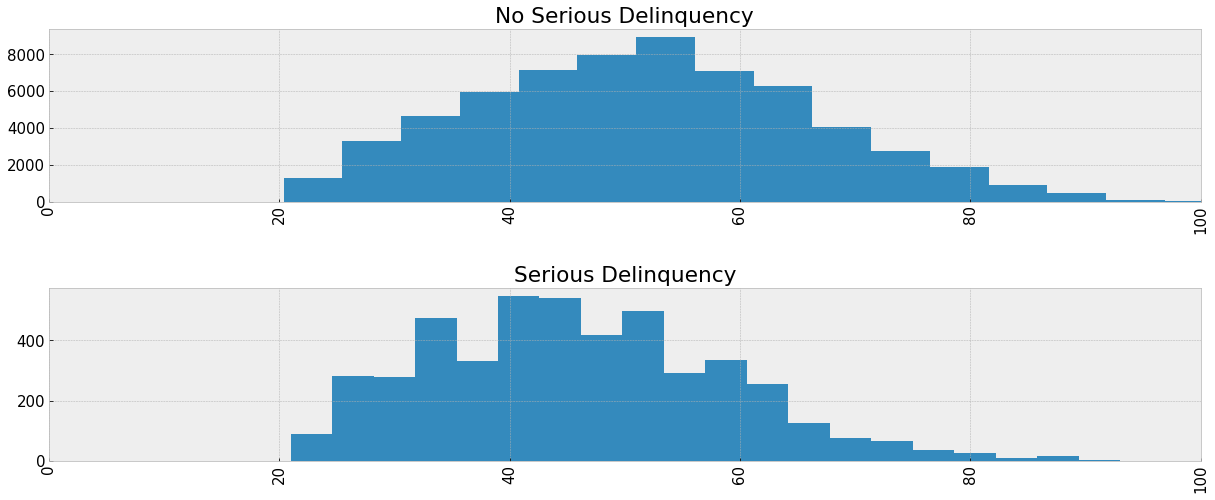

In [29]:
# another way to look at it
ax = train['age'].hist(by=train['serious_delinquency'], bins = 20, layout=(2,1))
ax[0].set_xlim((0,100))
ax[0].set_title('No Serious Delinquency')
ax[1].set_xlim((0,100))
ax[1].set_title('Serious Delinquency')


In [45]:
train.groupby('age').serious_delinquency.mean().sort_values(ascending=False)

age
33     0.127354
27     0.120968
28     0.120383
26     0.118151
35     0.117484
23     0.114478
29     0.113365
36     0.109756
32     0.106090
25     0.104925
24     0.099462
41     0.098404
31     0.097707
34     0.096552
39     0.096275
42     0.093729
30     0.091404
37     0.090461
46     0.088757
43     0.087842
49     0.086610
40     0.083108
44     0.079524
47     0.078613
52     0.076453
51     0.076350
38     0.075158
50     0.075145
45     0.074716
48     0.074432
53     0.070833
54     0.068398
22     0.065000
56     0.064496
57     0.062417
59     0.058069
21     0.056180
55     0.054641
60     0.053977
58     0.052288
61     0.049677
62     0.047244
91     0.044444
66     0.040968
65     0.040892
89     0.040404
63     0.039748
74     0.039182
67     0.038000
88     0.035714
64     0.033912
73     0.033003
93     0.032258
72     0.031746
87     0.031746
71     0.030856
70     0.028302
79     0.025126
78     0.023095
77     0.022573
82     0.021898
86     0.021898
76  

### QUESTION: Debt to Income Ratio
- Are applicants with higher debt to income ratio more likely to be seriously delinquent?

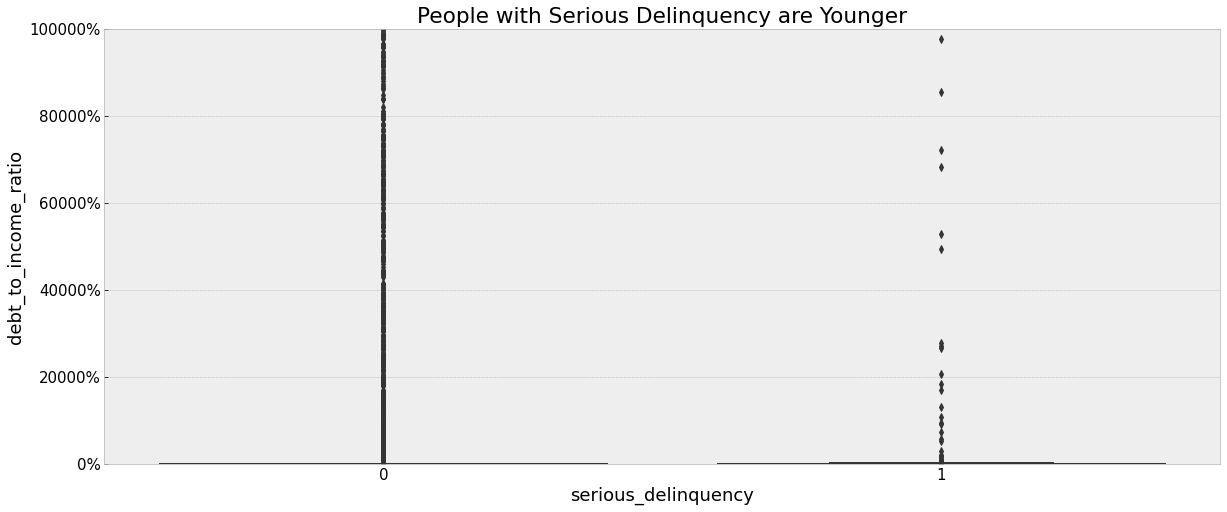

In [30]:
# create visualization for relationchip between age and serious delinquency
plt.title("People with Serious Delinquency are Younger")
ax = sns.boxplot(data = train, x = 'serious_delinquency', y = 'debt_to_income_ratio')
#  format y-axis into percent
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.0%}'))
plt.ylim(0, 1000)
plt.show()

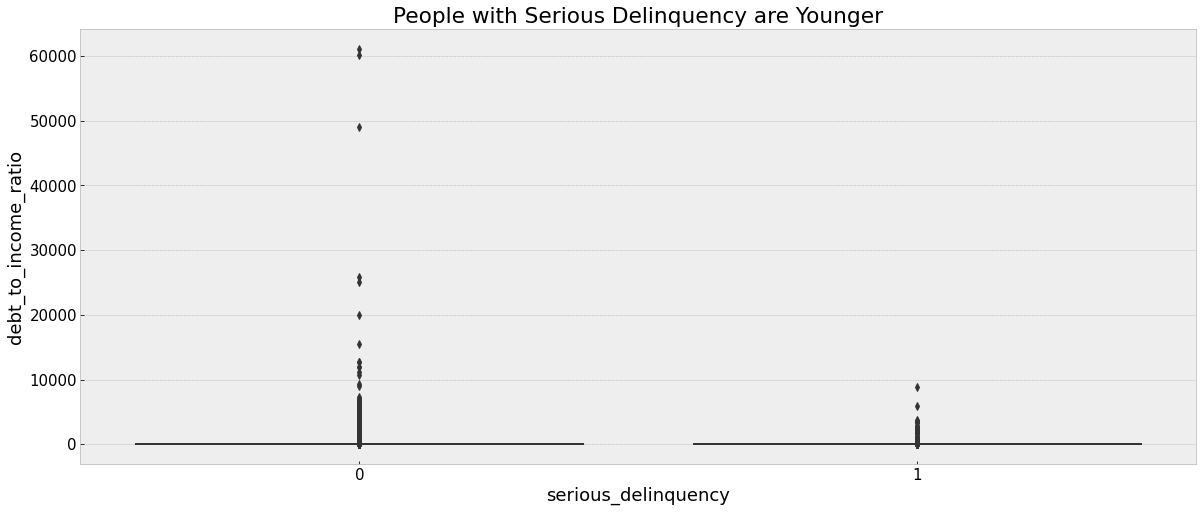

In [31]:
# create visualization for relationship between age and serious delinquency
plt.title("People with Serious Delinquency are Younger")
sns.boxplot(data = train, x = 'serious_delinquency', y = 'debt_to_income_ratio')
plt.show()

### B. Form a Hypothesis
H0: Serious Delinquency is not independent of age.
Ha: Serious Delinquency is not independent of age.

### C. Select Appropriate Test
CHI^2 - 2 Categorical Variables

In [32]:
observed = pd.crosstab(train.serious_delinquency, train.age)
observed

age,0,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,101,102
serious_delinquency,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,84,187,263,335,418,515,545,643,743,835,905,910,973,917,954,1022,1106,1169,1286,1357,1356,1344,1433,1470,1548,1540,1594,1629,1603,1600,1488,1510,1561,1471,1436,1465,1412,1450,1395,1332,1473,1452,1522,1225,1032,1030,962,878,783,721,691,671,586,564,462,467,433,423,388,355,299,268,167,169,163,134,122,108,95,73,43,28,30,11,11,2,6,2,1,1
1,0,5,13,34,37,49,69,75,88,95,84,98,108,142,98,127,126,110,95,137,123,148,139,138,127,125,150,136,131,152,130,123,125,119,108,83,101,94,80,86,76,77,72,63,43,44,44,38,18,14,21,22,22,20,23,7,10,10,10,10,7,3,6,2,3,3,3,4,4,4,0,2,0,1,0,0,0,0,0,0,0


### D. Set a Significance Level (Alpha)


In [33]:
alpha= 0.05

### E. Assumptions for CHI^2

### ANSWER:
- Those with serious delinquency are 6 years younger than those without serious delinquency, at 45.8 years old. 

----

### QUESTION

- What is the relationship between number of dependents and serious delinquency?

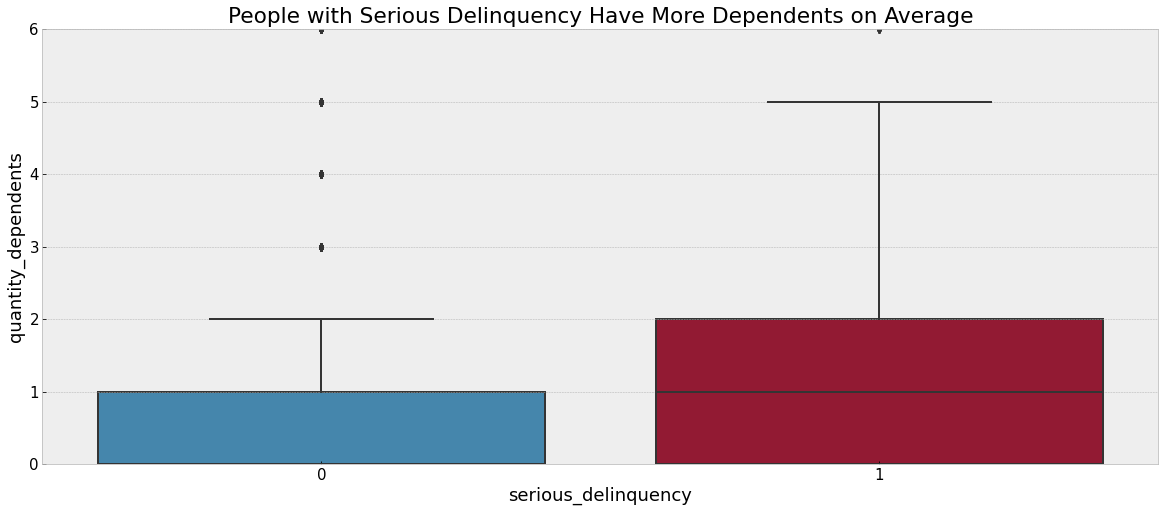

In [34]:
# create visualization for relationchip between number of dependents and serious delinquency
plt.title("People with Serious Delinquency Have More Dependents on Average")
ax=sns.boxplot(data = train, x = 'serious_delinquency', y = 'quantity_dependents')
ax.set_ylim(0, 6)
plt.show()

In [35]:
train.groupby(['serious_delinquency']).quantity_dependents.agg(['min', 'mean', 'max'])

,min,mean,max
serious_delinquency,,,
0,0.0,0.834046,20.0
1,0.0,1.033660,8.0


### ANSWER:
- Those with serious delinquency have 1 or more dependents on average, 1 more than those without serious delinquency, who have fewer than 1 depedent on average.  

### QUESTION

- What is the relationship between monthly income and serious delinquency?

In [36]:
# subset the data into no serious delinquency and serious delinquency
no_serious_delinquency = train[train.serious_delinquency == 0]
serious_delinquency = train[train.serious_delinquency == 1]

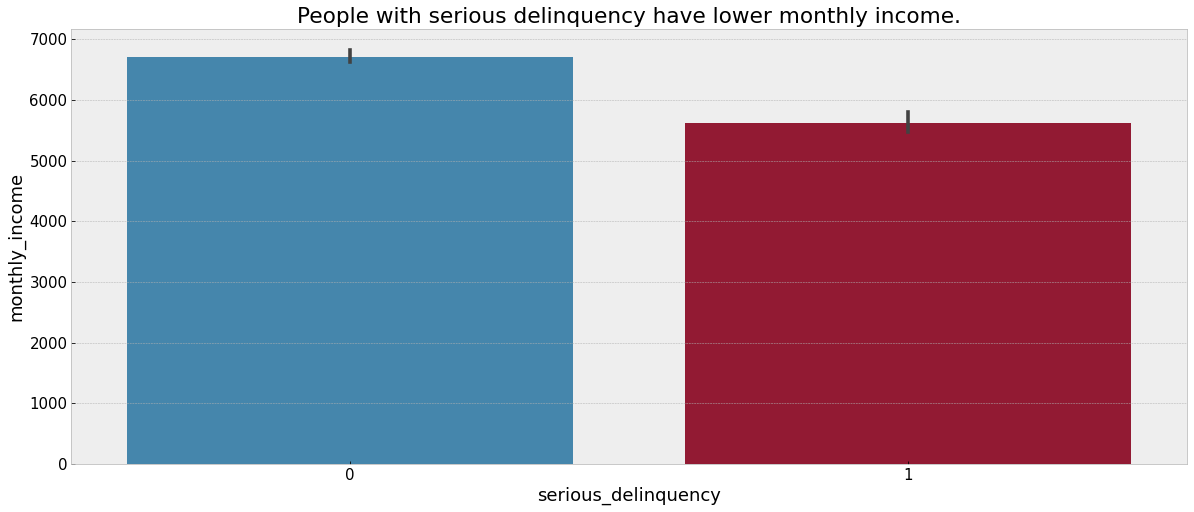

In [37]:
plt.title("People with serious delinquency have lower monthly income.")
sns.barplot(data = train, y = 'monthly_income', x = 'serious_delinquency')
plt.show()

In [38]:
train.groupby(['serious_delinquency']).monthly_income.agg(['min', 'mean', 'max'])

,min,mean,max
serious_delinquency,,,
0,0.0,6714.347740,1794060.0
1,0.0,5621.177461,234600.0


### ANSWER:
- Those with serious delinquency make \\$5600 per month on average, \\$1100 less than those without serious delinquency who make \\$6700 per month on average.

### QUESTION

What is the relationship between debt to income ratio and serious delinquency?

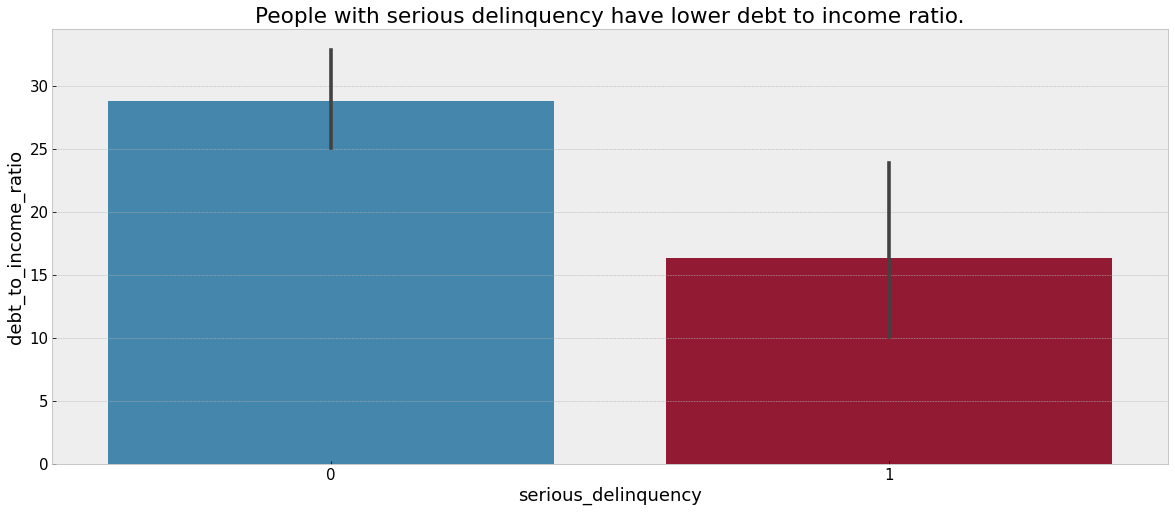

In [39]:
plt.title("People with serious delinquency have lower debt to income ratio.")
ax=sns.barplot(data = train, y = 'debt_to_income_ratio', x = 'serious_delinquency')
#make y-axis percentage
#ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.0%}'))
plt.show()

In [40]:
# single category, multiple aggregates
train.groupby(['serious_delinquency']).debt_to_income_ratio.agg(['min', 'mean', 'max'])

,min,mean,max
serious_delinquency,,,
0,0.0,28.757354,61106.5
1,0.0,16.358447,8901.0


### ANSWER:
- Those with serious delinquency have a 16% debt to income ratio, which is 12% lower than those without serious delinquency, who have a 29% debt to income ratio on average. 

---

### EXPLORE - Multivariate

1. How is monthly income related to serious_delinquency.

### EXPLORATION SUMMARY

Through exploration, we could see people with serious delinquency have 
- less monthly income
- more dependents
- lower debt to income ratio

===================================================================================================================================

## IV. MODEL

The goal is to create a robust and generalizable model that is a mapping between features and a target outcome.

## EVALUATION METRIX

In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67350 entries, 21945 to 146361
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   serious_delinquency         67350 non-null  int64   
 1   revolv_unsec_utilization    67350 non-null  float64 
 2   age                         67350 non-null  int64   
 3   quantity_30_59_pd           67350 non-null  int64   
 4   debt_to_income_ratio        67350 non-null  float64 
 5   monthly_income              67350 non-null  float64 
 6   quantity_loans_and_lines    67350 non-null  int64   
 7   quantity_90_days_pd         67350 non-null  int64   
 8   quantity_real_estate_loans  67350 non-null  int64   
 9   quantity_60_89_days_pd      67350 non-null  int64   
 10  quantity_dependents         67350 non-null  float64 
 11  age_bins                    67349 non-null  category
 12  quantity_dependents_bins    67350 non-null  category
dtypes: category

Because serious delinquency is a yes or no (boolean) value, classification machine learning algorithms were used to fit to the training data and the models were evaluated on validate data. The best model was selected using accuracy, because the data is mostly balanced, and the risk of an event happening balances the risk of getting a prediction wrong. In other words, the model was optimized for identifying true positives (actual delinquency when predicted), and true negatives (no serious delinquency when predicted), while minimizing false positive and false negatives.

### MODEL - SCALE

### Set X & y

In [42]:
# create X & y version of train, where y is a series with just the target variable and X are all the features. 
X_train = train.drop(columns=['serious_delinquency','quantity_90_days_pd'])
y_train = train.serious_delinquency

X_validate = validate.drop(columns=['serious_delinquency', 'quantity_90_days_pd'])
y_validate = validate.serious_delinquency

X_test = test.drop(columns=['serious_delinquency', 'quantity_90_days_pd'])
y_test = test.serious_delinquency

### Set Baseline

In [43]:
# Obtain the mode for the target
baseline = y_train.mode()

# produce boolean array with True assigned to match the baseline prediction and real data. 
matches_baseline_prediction = (y_train == 0)

baseline_accuracy = matches_baseline_prediction.mean()

print(f'Baseline Accuracy: {baseline_accuracy:.2%}')

Baseline Accuracy: 93.03%


### MODEL - DECISION TREE

In [44]:
#Create the object
clf1 = DecisionTreeClassifier(max_depth=2, random_state=123)
# Fit the model
clf1 = clf1.fit(X_train, y_train)

ValueError: could not convert string to float: 'age_40-49'

In [ ]:
#Visualize the model
plt.figure(figsize=(22, 12))
plot_tree(clf1,feature_names=X_train.columns)

In [ ]:
# make predictions
y_pred = clf1.predict(X_train)

In [ ]:
y_pred_proba = clf1.predict_proba(X_train)
pd.DataFrame(y_pred_proba, columns = ['Not Seriously Delinquent', 'Seriously Delinquent']).head()

### Evaluate Model

In [ ]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf1.score(X_train, y_train)))

### Create a Confusion Matrix
- True Positive: number of occurrences where serious delinquency is true and serious delinquency is predicted true.
- True Negative: number of occurrences where serious delinquency is false and serious delinquency is predicted false.
- False Positive: number of occurrences where serious delinquency is false and serious delinquency is predicted true.
- False Negative: number of occurrences where serious delinquency is true and serious delinquency is predicted false.

In [ ]:
confusion_matrix(y_train, y_pred)

In [ ]:
y_train.value_counts()

In [ ]:
labels = sorted(y_train.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

### Create a Classification Report
- Acuracy isn't everything, look at other evaluation metrics, such as recalll and precision.

In [ ]:
print(classification_report(y_train, y_pred))

### Evaluate the Model with our Validate dataset

In [ ]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(clf1.score(X_validate, y_validate)))

In [ ]:
# Produce y_predictions that come from the X_validate
y_pred = clf1.predict(X_validate)

# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_validate, y_pred))

### Model - RANDOM FOREST

In [ ]:
# Evaluate Random Forest models on train & validate set 
# by looping through different values for max_depth and min_samples_leaf hyperparameters

# create empty list for which to append metrics from each loop
scores = []
max_value = range(1,21)
# create loop for range 1-20
for i in max_value:
    # set depth & n_samples to value for current loop
    depth = i
    n_samples = i
    # define the model setting hyperparameters to values for current loop
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=123)
    # fit the model on train
    forest = forest.fit(X_train, y_train)
    # use the model and evaluate performance on train
    in_sample_accuracy = forest.score(X_train, y_train)
    # use the model and evaluate performance on validate
    out_of_sample_accuracy = forest.score(X_validate, y_validate)
    # create output of current loop’s hyperparameters and accuracy to append to metrics
    output = {
        'min_samples_per_leaf': n_samples,
        'max_depth': depth,
        'train_accuracy': in_sample_accuracy,
        'validate_accuracy': out_of_sample_accuracy
    }
    scores.append(output)
# convert metrics list to a dataframe for easy reading
df = pd.DataFrame(scores)
# add column to assess the difference between train & validate accuracy
df['difference'] = df.train_accuracy - df.validate_accuracy
df

In [ ]:
# The Random Forest model that performed the best on train & validate set had max_depth of 12 and min_sample_leaf of 12. 
# Isolating that model to use as best performing model. 

# define the model setting hyperparameters to values for the best performing model
forest = RandomForestClassifier(max_depth=13, min_samples_leaf=13, random_state=123)

# fit the model on train
forest = forest.fit(X_train, y_train)

# use the model and evaluate performance on train
train_accuracy = forest.score(X_train, y_train)
# use the model and evaluate performance on validate
validate_accuracy = forest.score(X_validate, y_validate)

print(f'train_accuracy: {train_accuracy: 2%}')
print(f'validate_accuracy: {validate_accuracy: 2%}')

### Model - LOGISTIC REGRESSION

In [ ]:
# Evaluate Logistic Regression models on train & validate set by looping through different values for c hyperparameter

# create empty list for which to append metrics from each loop
metrics = []

# create loop for values in list
for c in [.001, .005, .01, .05, .1, .5, 1, 5, 10, 50, 100, 500, 1000]:
            
    # define the model setting hyperparameters to values for current loop
    logit = LogisticRegression(C=c)
    
    # fit the model on train
    logit.fit(X_train, y_train)
    
    # use the model and evaluate performance on train
    train_accuracy = logit.score(X_train, y_train)
    # use the model and evaluate performance on validate
    validate_accuracy = logit.score(X_validate, y_validate)
    
    # create output of current loop's hyperparameters and accuracy to append to metrics
    output = {
        'C': c,
        'train_accuracy': train_accuracy,
        'validate_accuracy': validate_accuracy
    }
    
    metrics.append(output)

# convert metrics list to a dataframe for easy reading
df = pd.DataFrame(metrics)
# add column to assess the difference between train & validate accuracy
df['difference'] = df.train_accuracy - df.validate_accuracy
df

In [ ]:
# Feature importance
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

In [ ]:
#Make Probability
y_pred = logit.predict(X_train)

In [ ]:
# Estimate Predictions
y_pred_proba = logit.predict_proba(X_train)

Evaluate the Model with Our Validate Set
Done in Function above
The Logistic Regression Model that performed best had a c-statistic of 0.1 with a train accuracy of 93.0% and validate accuracy of 93.0.% performing nearly the same as baseline on unseen (validate) data.

### Create a Confusion Matrix
- True Positive: number of occurrences where churn is true and churn is predicted true.
- True Negative: number of occurrences where churn is false and churn is predicted false.
- False Positive: number of occurrences where churn is false and churn is predicted true.
- False Negative: number of occurrences where churn is true and churn is predicted false.

In [ ]:
print(confusion_matrix(y_train, y_pred))

Create Classification Report
Acuracy isn't everything, look at other evaluation metrics, such as recalll and precision.

In [ ]:
print(classification_report(y_train, y_pred))

### Best Model Overall
- The best performing model overall was the _, performing _ on train, __ on validate, and optimized for ___.
- This model will now be used on the test data to confirm best performance.

===================================================================================================================================

## V. CONCLUSION

### RECOMMENDATIONS

### NEXT STEPS